In [2]:
from importlib import reload


import astropy.units as u
import astropy.constants as const
from astroduet.duet_sensitivity import calc_snr
from astroduet.utils import get_neff
from astroduet.bbmag import bb_abmag_fluence, bb_abmag
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table



import astroduet.config as config
reload(config)
from astroduet.background import background_pixel_rate


from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
# Telescope setup

duet = config.Telescope()
read_noise = 3.*(2**0.5) # Read noise for two frames

print('Effective PSF size {}'.format(duet.psf_size))
# Get the number of effective background pixels
neff = get_neff(duet.psf_size, duet.pixel)
print('Number of effective bgd pixels: {}'.format(neff))
print()


Effective PSF size 7.337363286630968 arcsec
Number of effective bgd pixels: 3.597839101366366



In [5]:
[bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi = True, diag=True)

-----
Background Computation Integrating over Pixel Area
Telescope diameter: 26.0 cm
Transmission Efficiency: 0.8166518036622619


Pixel Size: 6.4 arcsec
Pixel Area: 40.96000000000001 arcsec2

Zodi Level: 77
Band1 Rate: 0.030369732491096913 1 / s
Band2 Rate: 0.24785885092656168 1 / s
-----


/Users/mheida/software/miniconda2/envs/duet/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


In [6]:
# Other settings and background computation

texp = 300*u.s
dist0 = 10*u.pc
dist = [50,100,200]*u.Mpc

colerr = 0.1 # Error on color in magnitudes

ab_vega = 1.73 # AB-Vega offset for Swift magnitudes

# Get the bands to project into
bandone = duet.bandpass1
bandtwo = duet.bandpass2
print(bandone)
print(bandtwo)


[175.90471511 229.23285853] nm
[247.67198996 315.83438085] nm


In [7]:
# Load Tony's lightcurves
shock_2e10 = np.loadtxt('../astroduet/data/shock_2.5e10.dat')
shock_5e10 = np.loadtxt('../astroduet/data/shock_5e10.dat')
shock_1e11 = np.loadtxt('../astroduet/data/shock_1e11.dat')
blukn_01 = np.loadtxt('../astroduet/data/kilonova_0.01.dat')
blukn_02 = np.loadtxt('../astroduet/data/kilonova_0.02.dat')
blukn_04 = np.loadtxt('../astroduet/data/kilonova_0.04.dat')

In [11]:
# Calculate absolute ABmags and photon rates in DUET bands for both models:

shock_2e10_lc = Table([(shock_2e10[:,0]*u.d).to(u.s),np.zeros(len(shock_2e10))*u.ABmag,np.zeros(len(shock_2e10))*u.ABmag,np.zeros(len(shock_2e10))*1/(u.s*u.cm**2),np.zeros(len(shock_2e10))*1/(u.s*u.cm**2)],
               names=('time', 'mag_D1', 'mag_D2', 'photflux_D1', 'photflux_D2'), meta={'name': 'Shock model - radius 2.5e10 cm - mags and photon flux at 10pc'})

for k in range(len(shock_2e10[:,0])): 
    bolflux = 10**shock_2e10[k,1] * (u.erg/u.s) /(4 * np.pi * dist0**2)
    band1_mag, band2_mag = bb_abmag(bbtemp=shock_2e10[k,2]*u.K, bandone=bandone, 
                            bandtwo=bandtwo, bolflux=bolflux, val=True)
    band1_fluence, band2_fluence = bb_abmag_fluence(bbtemp=shock_2e10[k,2]*u.K,
                            bolflux=bolflux)
    shock_2e10_lc[k]['mag_D1'],shock_2e10_lc[k]['mag_D2'] = band1_mag,band2_mag
    shock_2e10_lc[k]['photflux_D1'],shock_2e10_lc[k]['photflux_D2'] = band1_fluence.value,band2_fluence.value

shock_5e10_lc = Table([(shock_5e10[:,0]*u.d).to(u.s),np.zeros(len(shock_5e10))*u.ABmag,np.zeros(len(shock_5e10))*u.ABmag,np.zeros(len(shock_5e10))*1/(u.s*u.cm**2),np.zeros(len(shock_5e10))*1/(u.s*u.cm**2)],
               names=('time', 'mag_D1', 'mag_D2', 'photflux_D1', 'photflux_D2'), meta={'name': 'Shock model - radius 5e10 cm - mags and photon flux at 10pc'})

for k in range(len(shock_5e10[:,0])): 
    bolflux = 10**shock_5e10[k,1] * (u.erg/u.s) /(4 * np.pi * dist0**2)
    band1_mag, band2_mag = bb_abmag(bbtemp=shock_5e10[k,2]*u.K, bandone=bandone, 
                            bandtwo=bandtwo, bolflux=bolflux, val=True)
    band1_fluence, band2_fluence = bb_abmag_fluence(bbtemp=shock_5e10[k,2]*u.K,
                            bolflux=bolflux)
    shock_5e10_lc[k]['mag_D1'],shock_5e10_lc[k]['mag_D2'] = band1_mag,band2_mag
    shock_5e10_lc[k]['photflux_D1'],shock_5e10_lc[k]['photflux_D2'] = band1_fluence.value,band2_fluence.value

shock_1e11_lc = Table([(shock_1e11[:,0]*u.d).to(u.s),np.zeros(len(shock_1e11))*u.ABmag,np.zeros(len(shock_1e11))*u.ABmag,np.zeros(len(shock_1e11))*1/(u.s*u.cm**2),np.zeros(len(shock_1e11))*1/(u.s*u.cm**2)],
               names=('time', 'mag_D1', 'mag_D2', 'photflux_D1', 'photflux_D2'), meta={'name': 'Shock model - radius 1e11 cm - mags and photon flux at 10pc'})

for k in range(len(shock_1e11[:,0])): 
    bolflux = 10**shock_1e11[k,1] * (u.erg/u.s) /(4 * np.pi * dist0**2)
    band1_mag, band2_mag = bb_abmag(bbtemp=shock_1e11[k,2]*u.K, bandone=bandone, 
                            bandtwo=bandtwo, bolflux=bolflux,val=True)
    band1_fluence, band2_fluence = bb_abmag_fluence(bbtemp=shock_1e11[k,2]*u.K,
                            bolflux=bolflux)
    shock_1e11_lc[k]['mag_D1'],shock_1e11_lc[k]['mag_D2'] = band1_mag,band2_mag
    shock_1e11_lc[k]['photflux_D1'],shock_1e11_lc[k]['photflux_D2'] = band1_fluence.value,band2_fluence.value

        
blukn_01_lc = Table([(blukn_01[:,0]*u.d).to(u.s),np.zeros(len(blukn_01))*u.ABmag,np.zeros(len(blukn_01))*u.ABmag,np.zeros(len(blukn_01))*1/(u.s*u.cm**2),np.zeros(len(blukn_01))*1/(u.s*u.cm**2)],
               names=('time', 'mag_D1', 'mag_D2', 'photflux_D1', 'photflux_D2'), meta={'name': 'Blue kilonova model - mass 0.01 Msun - mags and photon flux at 10pc'})

for k in range(len(blukn_01[:,0])): 
    bolflux = 10**blukn_01[k,1] * (u.erg/u.s) /(4 * np.pi * dist0**2)
    band1_mag, band2_mag = bb_abmag(bbtemp=blukn_01[k,2]*u.K, bandone=bandone, 
                              bandtwo=bandtwo, bolflux=bolflux, val=True)
    band1_fluence, band2_fluence = bb_abmag_fluence(bbtemp=blukn_01[k,2]*u.K,
                            bolflux=bolflux)
    blukn_01_lc[k]['mag_D1'],blukn_01_lc[k]['mag_D2'] = band1_mag,band2_mag
    blukn_01_lc[k]['photflux_D1'],blukn_01_lc[k]['photflux_D2'] = band1_fluence.value,band2_fluence.value

blukn_02_lc = Table([(blukn_02[:,0]*u.d).to(u.s),np.zeros(len(blukn_02))*u.ABmag,np.zeros(len(blukn_02))*u.ABmag,np.zeros(len(blukn_02))*1/(u.s*u.cm**2),np.zeros(len(blukn_02))*1/(u.s*u.cm**2)],
               names=('time', 'mag_D1', 'mag_D2', 'photflux_D1', 'photflux_D2'), meta={'name': 'Blue kilonova model - mass 0.02 Msun - mags and photon flux at 10pc'})

for k in range(len(blukn_02[:,0])): 
    bolflux = 10**blukn_02[k,1] * (u.erg/u.s) /(4 * np.pi * dist0**2)
    band1_mag, band2_mag = bb_abmag(bbtemp=blukn_02[k,2]*u.K, bandone=bandone, 
                              bandtwo=bandtwo, bolflux=bolflux, val=True)
    band1_fluence, band2_fluence = bb_abmag_fluence(bbtemp=blukn_02[k,2]*u.K,
                            bolflux=bolflux)
    blukn_02_lc[k]['mag_D1'],blukn_02_lc[k]['mag_D2'] = band1_mag,band2_mag
    blukn_02_lc[k]['photflux_D1'],blukn_02_lc[k]['photflux_D2'] = band1_fluence.value,band2_fluence.value

blukn_04_lc = Table([(blukn_04[:,0]*u.d).to(u.s),np.zeros(len(blukn_04))*u.ABmag,np.zeros(len(blukn_04))*u.ABmag,np.zeros(len(blukn_04))*1/(u.s*u.cm**2),np.zeros(len(blukn_04))*1/(u.s*u.cm**2)],
               names=('time', 'mag_D1', 'mag_D2', 'photflux_D1', 'photflux_D2'), meta={'name': 'Blue kilonova model - mass 0.04 Msun - mags and photon flux at 10pc'})

for k in range(len(blukn_04[:,0])): 
    bolflux = 10**blukn_04[k,1] * (u.erg/u.s) /(4 * np.pi * dist0**2)
    band1_mag, band2_mag = bb_abmag(bbtemp=blukn_04[k,2]*u.K, bandone=bandone, 
                              bandtwo=bandtwo, bolflux=bolflux, val=True)
    band1_fluence, band2_fluence = bb_abmag_fluence(bbtemp=blukn_04[k,2]*u.K,
                            bolflux=bolflux)
    blukn_04_lc[k]['mag_D1'],blukn_04_lc[k]['mag_D2'] = band1_mag,band2_mag
    blukn_04_lc[k]['photflux_D1'],blukn_04_lc[k]['photflux_D2'] = band1_fluence.value,band2_fluence.value



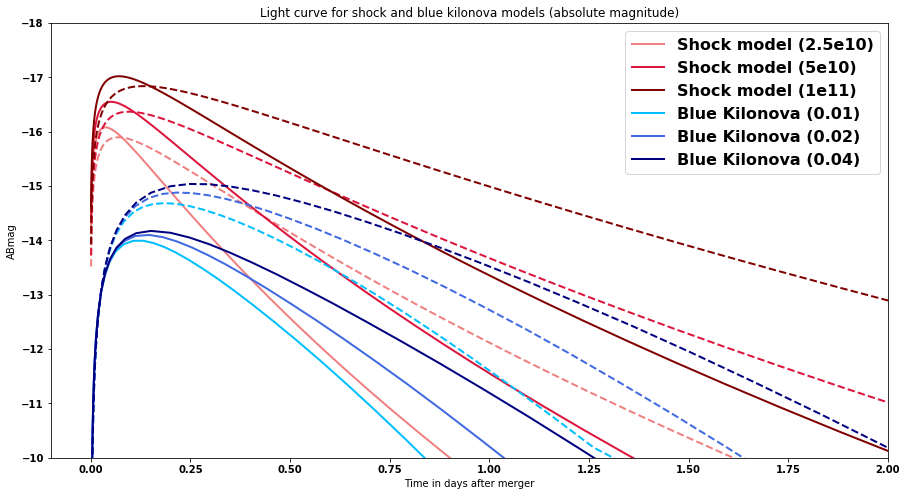

In [13]:
plt.plot((shock_2e10_lc['time']).to(u.d),shock_2e10_lc['mag_D1'], color='lightcoral', linestyle='-', linewidth=2, label='Shock model (2.5e10)')
plt.plot((shock_2e10_lc['time']).to(u.d),shock_2e10_lc['mag_D2'], color='lightcoral', linestyle='--', linewidth=2, label='_Shock model (2.5e10)')
plt.plot((shock_5e10_lc['time']).to(u.d),shock_5e10_lc['mag_D1'], color='crimson', linestyle='-', linewidth=2, label='Shock model (5e10)')
plt.plot((shock_5e10_lc['time']).to(u.d),shock_5e10_lc['mag_D2'], color='crimson', linestyle='--', linewidth=2, label='_Shock model (5e10)')
plt.plot((shock_1e11_lc['time']).to(u.d),shock_1e11_lc['mag_D1'], color='maroon', linestyle='-', linewidth=2, label='Shock model (1e11)')
plt.plot((shock_1e11_lc['time']).to(u.d),shock_1e11_lc['mag_D2'], color='maroon', linestyle='--', linewidth=2, label='_Shock model (1e11)')

plt.plot((blukn_01_lc['time']).to(u.d),blukn_01_lc['mag_D1'], color='deepskyblue', linestyle='-', linewidth=2, label='Blue Kilonova (0.01)')
plt.plot((blukn_01_lc['time']).to(u.d),blukn_01_lc['mag_D2'], color='deepskyblue', linestyle='--', linewidth=2, label='_Blue Kilonova (0.01)')
plt.plot((blukn_02_lc['time']).to(u.d),blukn_02_lc['mag_D1'], color='royalblue', linestyle='-', linewidth=2, label='Blue Kilonova (0.02)')
plt.plot((blukn_02_lc['time']).to(u.d),blukn_02_lc['mag_D2'], color='royalblue', linestyle='--', linewidth=2, label='_Blue Kilonova (0.02)')
plt.plot((blukn_04_lc['time']).to(u.d),blukn_04_lc['mag_D1'], color='navy', linestyle='-', linewidth=2, label='Blue Kilonova (0.04)')
plt.plot((blukn_04_lc['time']).to(u.d),blukn_04_lc['mag_D2'], color='navy', linestyle='--', linewidth=2, label='_Blue Kilonova (0.04)')

plt.axhline(y=22,xmin=0,xmax=1,color='black',linestyle=':')
plt.ylim(-10,-18)
plt.xlim(-0.1,2)
plt.legend(fontsize=16)
plt.xlabel('Time in days after merger')
plt.ylabel(r'ABmag')
plt.title('Light curve for shock and blue kilonova models (absolute magnitude)')
plt.show()

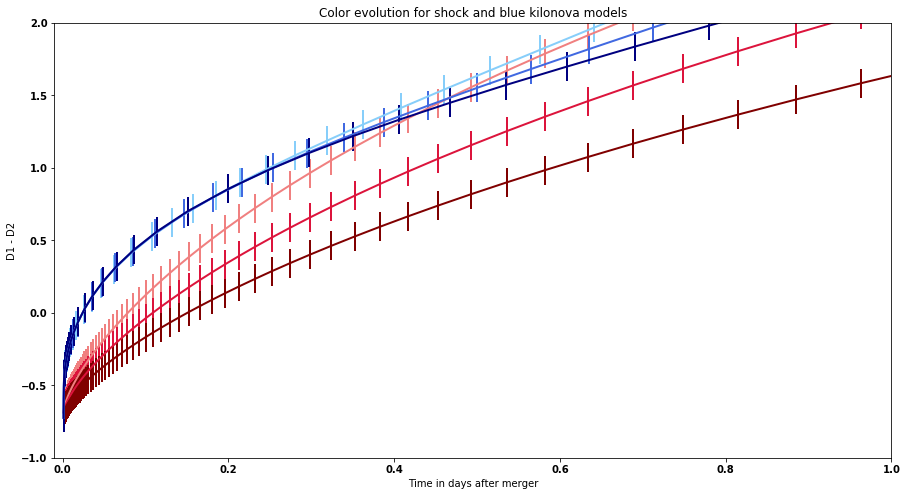

In [20]:
plt.errorbar(shock_2e10_lc['time']/((u.d).to(u.s)),shock_2e10_lc['mag_D1']-shock_2e10_lc['mag_D2'],yerr=colerr, linewidth=2, color='lightcoral', label='Shock model')
plt.errorbar(shock_5e10_lc['time']/((u.d).to(u.s)),shock_5e10_lc['mag_D1']-shock_5e10_lc['mag_D2'],yerr=colerr, linewidth=2, color='crimson', label='Shock model')
plt.errorbar(shock_1e11_lc['time']/((u.d).to(u.s)),shock_1e11_lc['mag_D1']-shock_1e11_lc['mag_D2'],yerr=colerr, linewidth=2, color='maroon', label='Shock model')
plt.errorbar(blukn_01_lc['time']/((u.d).to(u.s)),blukn_01_lc['mag_D1']-blukn_01_lc['mag_D2'],yerr=colerr ,linewidth=2, color='lightskyblue', label='Blue kilonova')
plt.errorbar(blukn_02_lc['time']/((u.d).to(u.s)),blukn_02_lc['mag_D1']-blukn_02_lc['mag_D2'],yerr=colerr ,linewidth=2, color='royalblue', label='Blue kilonova')
plt.errorbar(blukn_04_lc['time']/((u.d).to(u.s)),blukn_04_lc['mag_D1']-blukn_04_lc['mag_D2'],yerr=colerr ,linewidth=2, color='navy', label='Blue kilonova')

plt.ylim(-1,2)
plt.xlim(-0.01,1)
#plt.legend()
plt.xlabel('Time in days after merger')
plt.ylabel(r'D1 - D2')
plt.title('Color evolution for shock and blue kilonova models')
plt.show()

In [21]:
# Calculate S/N for both models:

shock_2e10_snr = np.zeros([len(dist),len(shock_2e10[:,0]),3])
shock_2e10_snr[:,:,0] = shock_2e10[:,0]
for j, distval in enumerate(dist):
    band1_fluence = shock_2e10_lc['photflux_D1'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band2_fluence = shock_2e10_lc['photflux_D2'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band1_rate = duet.trans_eff * duet.eff_area * band1_fluence
    band2_rate = duet.trans_eff * duet.eff_area * band2_fluence
    snr1 = calc_snr(texp, band1_rate, bgd_band1, read_noise, neff)
    snr2 = calc_snr(texp, band2_rate, bgd_band2, read_noise, neff)
    shock_2e10_snr[j,:,1] = snr1
    shock_2e10_snr[j,:,2] = snr2

shock_5e10_snr = np.zeros([len(dist),len(shock_5e10[:,0]),3])
shock_5e10_snr[:,:,0] = shock_5e10[:,0]
for j, distval in enumerate(dist):
    band1_fluence = shock_5e10_lc['photflux_D1'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band2_fluence = shock_5e10_lc['photflux_D2'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band1_rate = duet.trans_eff * duet.eff_area *  band1_fluence
    band2_rate = duet.trans_eff * duet.eff_area *  band2_fluence
    snr1 = calc_snr(texp, band1_rate, bgd_band1, read_noise, neff)
    snr2 = calc_snr(texp, band2_rate, bgd_band2, read_noise, neff)
    shock_5e10_snr[j,:,1] = snr1
    shock_5e10_snr[j,:,2] = snr2

shock_1e11_snr = np.zeros([len(dist),len(shock_1e11[:,0]),3])
shock_1e11_snr[:,:,0] = shock_1e11[:,0]
for j, distval in enumerate(dist):
    band1_fluence = shock_1e11_lc['photflux_D1'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band2_fluence = shock_1e11_lc['photflux_D2'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band1_rate = duet.trans_eff * duet.eff_area *  band1_fluence
    band2_rate = duet.trans_eff * duet.eff_area *  band2_fluence
    snr1 = calc_snr(texp, band1_rate, bgd_band1, read_noise, neff)
    snr2 = calc_snr(texp, band2_rate, bgd_band2, read_noise, neff)
    shock_1e11_snr[j,:,1] = snr1
    shock_1e11_snr[j,:,2] = snr2

blukn_01_snr = np.zeros([len(dist),len(blukn_01[:,0]),3])
blukn_01_snr[:,:,0] = blukn_01[:,0]
for j, distval in enumerate(dist):
    band1_fluence = blukn_01_lc['photflux_D1'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band2_fluence = blukn_01_lc['photflux_D2'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band1_rate = duet.trans_eff * duet.eff_area *  band1_fluence
    band2_rate = duet.trans_eff * duet.eff_area *  band2_fluence
    snr1 = calc_snr(texp, band1_rate, bgd_band1, read_noise, neff)
    snr2 = calc_snr(texp, band2_rate, bgd_band2, read_noise, neff)
    blukn_01_snr[j,:,1] = snr1
    blukn_01_snr[j,:,2] = snr2
        
blukn_02_snr = np.zeros([len(dist),len(blukn_02[:,0]),3])
blukn_02_snr[:,:,0] = blukn_02[:,0]
for j, distval in enumerate(dist):
    band1_fluence = blukn_02_lc['photflux_D1'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band2_fluence = blukn_02_lc['photflux_D2'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band1_rate = duet.trans_eff * duet.eff_area *  band1_fluence
    band2_rate = duet.trans_eff * duet.eff_area *  band2_fluence
    snr1 = calc_snr(texp, band1_rate, bgd_band1, read_noise, neff)
    snr2 = calc_snr(texp, band2_rate, bgd_band2, read_noise, neff)
    blukn_02_snr[j,:,1] = snr1
    blukn_02_snr[j,:,2] = snr2

blukn_04_snr = np.zeros([len(dist),len(blukn_04[:,0]),3])
blukn_04_snr[:,:,0] = blukn_04[:,0]
for j, distval in enumerate(dist):
    band1_fluence = blukn_04_lc['photflux_D1'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band2_fluence = blukn_04_lc['photflux_D2'].quantity*(dist0.to(u.pc)/distval.to(u.pc))**2
    band1_rate = duet.trans_eff * duet.eff_area *  band1_fluence
    band2_rate = duet.trans_eff * duet.eff_area *  band2_fluence
    snr1 = calc_snr(texp, band1_rate, bgd_band1, read_noise, neff)
    snr2 = calc_snr(texp, band2_rate, bgd_band2, read_noise, neff)
    blukn_04_snr[j,:,1] = snr1
    blukn_04_snr[j,:,2] = snr2

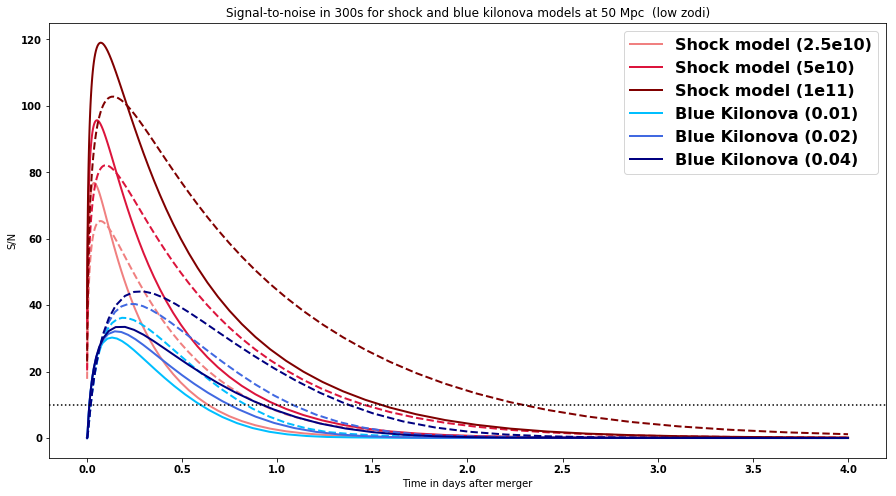

In [26]:
plt.plot(shock_2e10_snr[0,:,0],shock_2e10_snr[0,:,1], color='lightcoral', linestyle='-', linewidth=2, label='Shock model (2.5e10)')
plt.plot(shock_2e10_snr[0,:,0],shock_2e10_snr[0,:,2], color='lightcoral', linestyle='--', linewidth=2, label='_Shock model (2.5e10)')
plt.plot(shock_5e10_snr[0,:,0],shock_5e10_snr[0,:,1], color='crimson', linestyle='-', linewidth=2, label='Shock model (5e10)')
plt.plot(shock_5e10_snr[0,:,0],shock_5e10_snr[0,:,2], color='crimson', linestyle='--', linewidth=2, label='_Shock model (5e10)')
plt.plot(shock_1e11_snr[0,:,0],shock_1e11_snr[0,:,1], color='maroon', linestyle='-', linewidth=2, label='Shock model (1e11)')
plt.plot(shock_1e11_snr[0,:,0],shock_1e11_snr[0,:,2], color='maroon', linestyle='--', linewidth=2, label='_Shock model (1e11)')

plt.plot(blukn_01_snr[0,:,0],blukn_01_snr[0,:,1], color='deepskyblue', linestyle='-', linewidth=2, label='Blue Kilonova (0.01)')
plt.plot(blukn_01_snr[0,:,0],blukn_01_snr[0,:,2], color='deepskyblue', linestyle='--', linewidth=2, label='_Blue Kilonova (0.01)')
plt.plot(blukn_02_snr[0,:,0],blukn_02_snr[0,:,1], color='royalblue', linestyle='-', linewidth=2, label='Blue Kilonova (0.02)')
plt.plot(blukn_02_snr[0,:,0],blukn_02_snr[0,:,2], color='royalblue', linestyle='--', linewidth=2, label='_Blue Kilonova (0.02)')
plt.plot(blukn_04_snr[0,:,0],blukn_04_snr[0,:,1], color='navy', linestyle='-', linewidth=2, label='Blue Kilonova (0.04)')
plt.plot(blukn_04_snr[0,:,0],blukn_04_snr[0,:,2], color='navy', linestyle='--', linewidth=2, label='_Blue Kilonova (0.04)')

plt.axhline(y=10,xmin=0,xmax=1,color='black',linestyle=':')
#plt.ylim(26,18)
#plt.xlim(-0.1,2)
plt.legend(fontsize=16)
plt.xlabel('Time in days after merger')
plt.ylabel(r'S/N')
plt.title('Signal-to-noise in 300s for shock and blue kilonova models at 50 Mpc  (low zodi)')
plt.show()

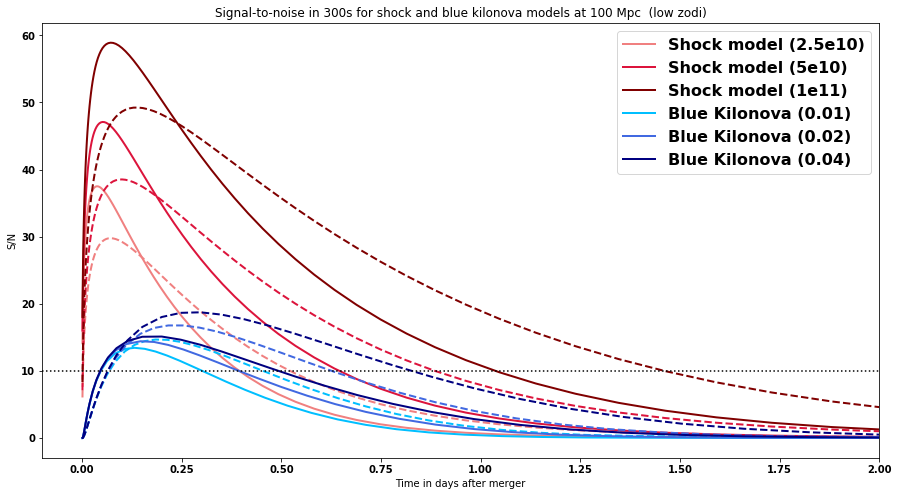

In [27]:
plt.plot(shock_2e10_snr[1,:,0],shock_2e10_snr[1,:,1], color='lightcoral', linestyle='-', linewidth=2, label='Shock model (2.5e10)')
plt.plot(shock_2e10_snr[1,:,0],shock_2e10_snr[1,:,2], color='lightcoral', linestyle='--', linewidth=2, label='_Shock model (2.5e10)')
plt.plot(shock_5e10_snr[1,:,0],shock_5e10_snr[1,:,1], color='crimson', linestyle='-', linewidth=2, label='Shock model (5e10)')
plt.plot(shock_5e10_snr[1,:,0],shock_5e10_snr[1,:,2], color='crimson', linestyle='--', linewidth=2, label='_Shock model (5e10)')
plt.plot(shock_1e11_snr[1,:,0],shock_1e11_snr[1,:,1], color='maroon', linestyle='-', linewidth=2, label='Shock model (1e11)')
plt.plot(shock_1e11_snr[1,:,0],shock_1e11_snr[1,:,2], color='maroon', linestyle='--', linewidth=2, label='_Shock model (1e11)')

plt.plot(blukn_01_snr[1,:,0],blukn_01_snr[1,:,1], color='deepskyblue', linestyle='-', linewidth=2, label='Blue Kilonova (0.01)')
plt.plot(blukn_01_snr[1,:,0],blukn_01_snr[1,:,2], color='deepskyblue', linestyle='--', linewidth=2, label='_Blue Kilonova (0.01)')
plt.plot(blukn_02_snr[1,:,0],blukn_02_snr[1,:,1], color='royalblue', linestyle='-', linewidth=2, label='Blue Kilonova (0.02)')
plt.plot(blukn_02_snr[1,:,0],blukn_02_snr[1,:,2], color='royalblue', linestyle='--', linewidth=2, label='_Blue Kilonova (0.02)')
plt.plot(blukn_04_snr[1,:,0],blukn_04_snr[1,:,1], color='navy', linestyle='-', linewidth=2, label='Blue Kilonova (0.04)')
plt.plot(blukn_04_snr[1,:,0],blukn_04_snr[1,:,2], color='navy', linestyle='--', linewidth=2, label='_Blue Kilonova (0.04)')


plt.axhline(y=10,xmin=0,xmax=1,color='black',linestyle=':')
#plt.ylim(26,18)
plt.xlim(-0.1,2)
plt.legend(fontsize=16)
plt.xlabel('Time in days after merger')
plt.ylabel(r'S/N')
plt.title('Signal-to-noise in 300s for shock and blue kilonova models at 100 Mpc  (low zodi)')
plt.show()

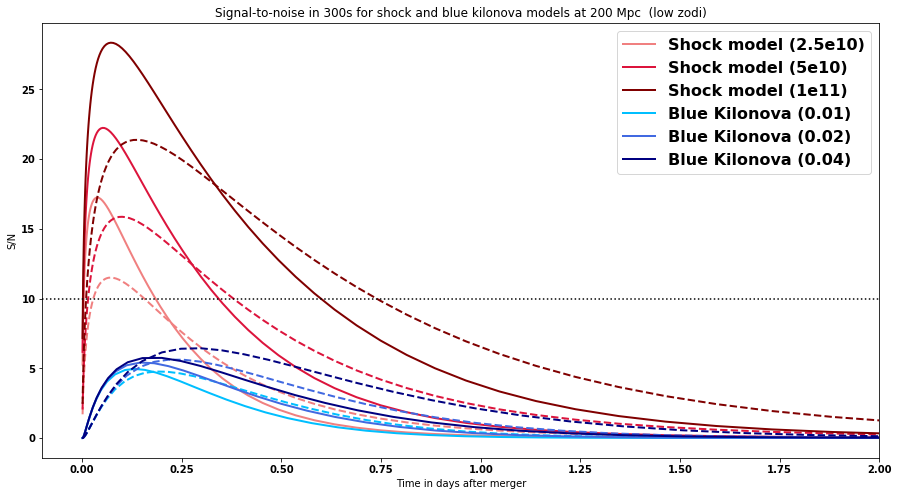

In [28]:
plt.plot(shock_2e10_snr[2,:,0],shock_2e10_snr[2,:,1], color='lightcoral', linestyle='-', linewidth=2, label='Shock model (2.5e10)')
plt.plot(shock_2e10_snr[2,:,0],shock_2e10_snr[2,:,2], color='lightcoral', linestyle='--', linewidth=2, label='_Shock model (2.5e10)')
plt.plot(shock_5e10_snr[2,:,0],shock_5e10_snr[2,:,1], color='crimson', linestyle='-', linewidth=2, label='Shock model (5e10)')
plt.plot(shock_5e10_snr[2,:,0],shock_5e10_snr[2,:,2], color='crimson', linestyle='--', linewidth=2, label='_Shock model (5e10)')
plt.plot(shock_1e11_snr[2,:,0],shock_1e11_snr[2,:,1], color='maroon', linestyle='-', linewidth=2, label='Shock model (1e11)')
plt.plot(shock_1e11_snr[2,:,0],shock_1e11_snr[2,:,2], color='maroon', linestyle='--', linewidth=2, label='_Shock model (1e11)')

plt.plot(blukn_01_snr[2,:,0],blukn_01_snr[2,:,1], color='deepskyblue', linestyle='-', linewidth=2, label='Blue Kilonova (0.01)')
plt.plot(blukn_01_snr[2,:,0],blukn_01_snr[2,:,2], color='deepskyblue', linestyle='--', linewidth=2, label='_Blue Kilonova (0.01)')
plt.plot(blukn_02_snr[2,:,0],blukn_02_snr[2,:,1], color='royalblue', linestyle='-', linewidth=2, label='Blue Kilonova (0.02)')
plt.plot(blukn_02_snr[2,:,0],blukn_02_snr[2,:,2], color='royalblue', linestyle='--', linewidth=2, label='_Blue Kilonova (0.02)')
plt.plot(blukn_04_snr[2,:,0],blukn_04_snr[2,:,1], color='navy', linestyle='-', linewidth=2, label='Blue Kilonova (0.04)')
plt.plot(blukn_04_snr[2,:,0],blukn_04_snr[2,:,2], color='navy', linestyle='--', linewidth=2, label='_Blue Kilonova (0.04)')

plt.axhline(y=10,xmin=0,xmax=1,color='black',linestyle=':')
#plt.ylim(26,18)
plt.xlim(-0.1,2)
plt.legend(fontsize=16)
plt.xlabel('Time in days after merger')
plt.ylabel(r'S/N')
plt.title('Signal-to-noise in 300s for shock and blue kilonova models at 200 Mpc  (low zodi)')
plt.show()

In [29]:
# Remove ABmag units, write to fits tables
shock_2e10_lc['mag_D1'].unit = None
shock_2e10_lc['mag_D2'].unit = None
shock_5e10_lc['mag_D1'].unit = None
shock_5e10_lc['mag_D2'].unit = None
shock_1e11_lc['mag_D1'].unit = None
shock_1e11_lc['mag_D2'].unit = None
blukn_01_lc['mag_D1'].unit = None
blukn_01_lc['mag_D2'].unit = None
blukn_02_lc['mag_D1'].unit = None
blukn_02_lc['mag_D2'].unit = None
blukn_04_lc['mag_D1'].unit = None
blukn_04_lc['mag_D2'].unit = None
shock_2e10_lc.write('../astroduet/data/shock_2.5e10_lightcurve_DUET.fits', format='fits', overwrite=True)
shock_5e10_lc.write('../astroduet/data/shock_5e10_lightcurve_DUET.fits', format='fits', overwrite=True)
shock_1e11_lc.write('../astroduet/data/shock_1e11_lightcurve_DUET.fits', format='fits', overwrite=True)
blukn_01_lc.write('../astroduet/data/blukn_01_lightcurve_DUET.fits', format='fits', overwrite=True)
blukn_02_lc.write('../astroduet/data/blukn_02_lightcurve_DUET.fits', format='fits', overwrite=True)
blukn_04_lc.write('../astroduet/data/blukn_04_lightcurve_DUET.fits', format='fits', overwrite=True)
shock_2e10_lc['mag_D1'].unit = u.ABmag
shock_2e10_lc['mag_D2'].unit = u.ABmag
shock_5e10_lc['mag_D1'].unit = u.ABmag
shock_5e10_lc['mag_D2'].unit = u.ABmag
shock_1e11_lc['mag_D1'].unit = u.ABmag
shock_1e11_lc['mag_D2'].unit = u.ABmag
blukn_01_lc['mag_D1'].unit = u.ABmag
blukn_01_lc['mag_D2'].unit = u.ABmag
blukn_02_lc['mag_D1'].unit = u.ABmag
blukn_02_lc['mag_D2'].unit = u.ABmag
blukn_04_lc['mag_D1'].unit = u.ABmag
blukn_04_lc['mag_D2'].unit = u.ABmag